# Outline/Purpose:

The overall purpose of this project is to train a machine learning model on the assumed email data to forecast if an email is spam or not spam, and to pick the best preferred model for this classification task.


1.	Pre-process the data: Clean the data-set and eliminate any irrelevant information. As our data is already in numerical arrangement converting it was not essential.
2.	Training the models: This step includes splitting our data set into Training data and Test data. Ultimately ‘Train’ several supervised classification models such as KNN, SVM, Naive Bayes, Decision Trees, Random Forest, and Logistic Regression using the pre-processed data.
3.	Appraise the models: Assess the performance of the models via metrics such as accuracy, precision, recall, and F1-score.
4.	Elect the best and least preferred models: Based on the evaluation, choose the best model that provides the highest accuracy and has the best overall performance.



In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler





# Load and Preprocess the data:
Below code will load the data from the csv file into a pandas dataframe, remove the first column which is the email number, replace all non-numeric characters with NaN values, fill the missing values with 0, convert the data into integer type, and store it as dataframe named 'df'.

In [4]:
# Load the data from csv file into a pandas dataframe
df = pd.read_csv("./data.csv")

# Remove the first column (Email name) as it is not relevant for the prediction
df = df.drop(columns=['Email No.'])

# Replace non-numeric characters with NaN values
df = df.replace(r'[^\d.]+', value=float('nan'), regex=True)

# Fill missing values with 0
df.fillna(0, inplace=True)

# Convert the data into integer type
df = df.astype(int)
df

,Prediction,the,to,ect,and,for,of,a,you,hou,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,0,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,0,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,0,1,0
5169,1,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,0
5170,1,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,0,1,0


# Training the Models 

Splitting our Data Set into Training Data and Test Data

(https://stackoverflow.com/questions/56311638/how-how-iloc-1-works-can-any-one-explain-1-params)

In [5]:
# Split the data into features (X) and labels (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Defining Array for 'Results'

In [7]:
# Define a dictionary to store the results of each model
results = {}

# Building a Machine Learning KNN Model

What is K-Nearest Neighbour? It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'

In [8]:
# Train KNN model
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train)

# Predict the target values for test set
y_pred_KNN = model_KNN.predict(X_test)

# Evaluate the KNN model
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN,average='macro',zero_division=0)
recall_KNN = recall_score(y_test, y_pred_KNN,average='macro',zero_division=0)
f1_KNN = f1_score(y_test, y_pred_KNN,average='macro',zero_division=0)

# Store the results of KNN model in the dictionary
results["KNN"] = {"accuracy": accuracy_KNN, 
                  "precision": precision_KNN, 
                  "recall": recall_KNN, 
                  "f1_score": f1_KNN
                 }
print(results["KNN"])

{'accuracy': 0.996135265700483, 'precision': 0.5545865633074936, 'recall': 0.49967637540453075, 'f1_score': 0.5231629024063554}


C:\Users\prabh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Building a Machine Learning SVM Model

What is SVM Model? Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples

In [9]:
# Train SVM model
model_SVM = SVC()
model_SVM.fit(X_train, y_train)

# Predict the target values for test set
y_pred_SVM = model_SVM.predict(X_test)

# Evaluate the SVM model
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
precision_SVM = precision_score(y_test, y_pred_SVM,average='macro',zero_division=0)
recall_SVM = recall_score(y_test, y_pred_SVM,average='macro',zero_division=0)
f1_SVM = f1_score(y_test, y_pred_SVM,average='macro',zero_division=0)

# Store the results of SVM model in the dictionary
results["SVM"] = {"accuracy": accuracy_SVM, 
                  "precision": precision_SVM, 
                  "recall": recall_SVM, 
                  "f1_score": f1_SVM
                 }
print(results["SVM"])

{'accuracy': 0.9951690821256038, 'precision': 0.33172302737520126, 'recall': 0.3333333333333333, 'f1_score': 0.33252623083131555}


# Building a Machine Learning Naive Bayes  Model
What is Naive Bayes  Model? Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set.

In [10]:
# Train Naive Bayes model
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

# Predict the target values for test set
y_pred_NB = model_NB.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_NB = accuracy_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB,average='macro',zero_division=0)
recall_NB = recall_score(y_test, y_pred_NB,average='macro',zero_division=0)
f1_NB = f1_score(y_test, y_pred_NB,average='macro',zero_division=0)

# Store the results of Naive Bayes model in the dictionary
results["Naive Bayes"] = {"accuracy": accuracy_NB, 
                          "precision": precision_NB, 
                          "recall": recall_NB, 
                          "f1_score": f1_NB
                         }
print(results["Naive Bayes"])

{'accuracy': 0.9652173913043478, 'precision': 0.3421036714449888, 'recall': 0.40631067961165046, 'f1_score': 0.34544583954032776}


# Building a Machine Learning Decision Tree Model
What is Decision Tree Model? Decision trees are an approach used in supervised machine learning, a technique which uses labelled input and output datasets to train models. The approach is used mainly to solve classification problems, which is the use of a model to categorise or classify an object

In [11]:
# Train Decision Tree model
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)

# Predict the target values for test set
y_pred_DT = model_DT.predict(X_test)

# Evaluate the Decision Tree model
accuracy_DT = accuracy_score(y_test, y_pred_DT)
precision_DT = precision_score(y_test, y_pred_DT,average='macro',zero_division=0)
recall_DT = recall_score(y_test, y_pred_DT,average='macro',zero_division=0)
f1_DT = f1_score(y_test, y_pred_DT,average='macro',zero_division=0)

# Store the results of Decision Tree model in the dictionary
results["Decision Tree"] = {"accuracy": accuracy_DT, 
                            "precision": precision_DT, 
                            "recall": recall_DT, 
                            "f1_score": f1_DT
                           }
                         
print(results["Decision Tree"])

{'accuracy': 0.9932367149758454, 'precision': 0.44347262714609653, 'recall': 0.498705501618123, 'f1_score': 0.46553343046786466}


# Building a Machine Learning Random Forest Model
What is Random Forest Model? A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms,The (random forest) algorithm establishes the outcome based on the predictions of the decision trees. It predicts by taking the average or mean of the output from various trees. Increasing the number of trees increases the precision of the outcome.

In [12]:
# Train Random Forest model
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

# Predict the target values for test set
y_pred_RF = model_RF.predict(X_test)

# Evaluate the Random Forest model
accuracy_RF = accuracy_score(y_test, y_pred_RF)
precision_RF = precision_score(y_test, y_pred_RF,average='macro',zero_division=0)
recall_RF = recall_score(y_test, y_pred_RF,average='macro',zero_division=0)
f1_RF = f1_score(y_test, y_pred_RF,average='macro',zero_division=0)

# Store the results of Random Forest model in the dictionary
results["Random Forest"] = {"accuracy": accuracy_RF, 
                            "precision": precision_RF, 
                            "recall": recall_RF, 
                            "f1_score": f1_RF
                           }
print(results["Random Forest"])

{'accuracy': 0.9971014492753624, 'precision': 0.6656986124556309, 'recall': 0.5, 'f1_score': 0.5550708245812462}


# Building a Machine Learning Logistic Regression Model

What is Logistic Regression?
Logistic Regression is a “Supervised machine learning” algorithm that can be used to model the probability of a certain class or event. It is used when the data is linearly separable and the outcome is binary or dichotomous in nature.

That means Logistic regression is usually used for Binary classification problems.

In [13]:
# Train Logistic Regression model
model_LR = LogisticRegression(solver='lbfgs',max_iter=1000)
model_LR.fit(X_train, y_train)

# Predict the target values for test set
y_pred_LR = model_LR.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_LR = accuracy_score(y_test, y_pred_LR)
precision_LR = precision_score(y_test, y_pred_LR,average='macro',zero_division=0)
recall_LR = recall_score(y_test, y_pred_LR,average='macro',zero_division=0)
f1_LR = f1_score(y_test, y_pred_LR,average='macro',zero_division=0)

# Store the results of Logistic Regression model in the dictionary
results["Logistic Regression"] = {"accuracy": accuracy_LR, 
                                  "precision": precision_LR, 
                                  "recall": recall_LR, 
                                  "f1_score": f1_LR
                                 }
print(results["Logistic Regression"])

{'accuracy': 0.996135265700483, 'precision': 0.523485269594219, 'recall': 0.6656957928802588, 'f1_score': 0.5751096975586772}


C:\Users\prabh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Print the final results of all models
results

{'KNN': {'accuracy': 0.996135265700483,
  'precision': 0.5545865633074936,
  'recall': 0.49967637540453075,
  'f1_score': 0.5231629024063554},
 'SVM': {'accuracy': 0.9951690821256038,
  'precision': 0.33172302737520126,
  'recall': 0.3333333333333333,
  'f1_score': 0.33252623083131555},
 'Naive Bayes': {'accuracy': 0.9652173913043478,
  'precision': 0.3421036714449888,
  'recall': 0.40631067961165046,
  'f1_score': 0.34544583954032776},
 'Decision Tree': {'accuracy': 0.9932367149758454,
  'precision': 0.44347262714609653,
  'recall': 0.498705501618123,
  'f1_score': 0.46553343046786466},
 'Random Forest': {'accuracy': 0.9971014492753624,
  'precision': 0.6656986124556309,
  'recall': 0.5,
  'f1_score': 0.5550708245812462},
 'Logistic Regression': {'accuracy': 0.996135265700483,
  'precision': 0.523485269594219,
  'recall': 0.6656957928802588,
  'f1_score': 0.5751096975586772}}

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model Visuals and Analysis

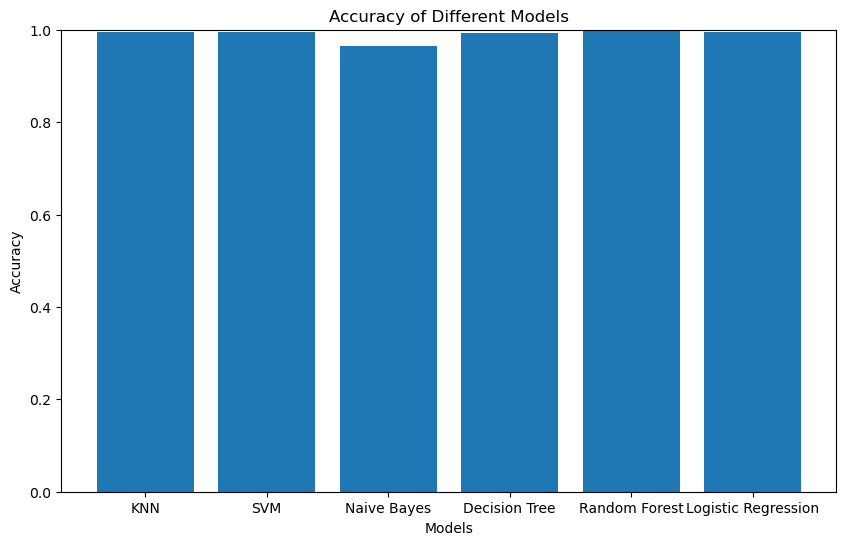

In [16]:
# Plot the accuracy of all models
plt.figure(figsize=(10,6))
plt.bar(results.keys(), [result["accuracy"] for result in results.values()])
plt.title("Accuracy of Different Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

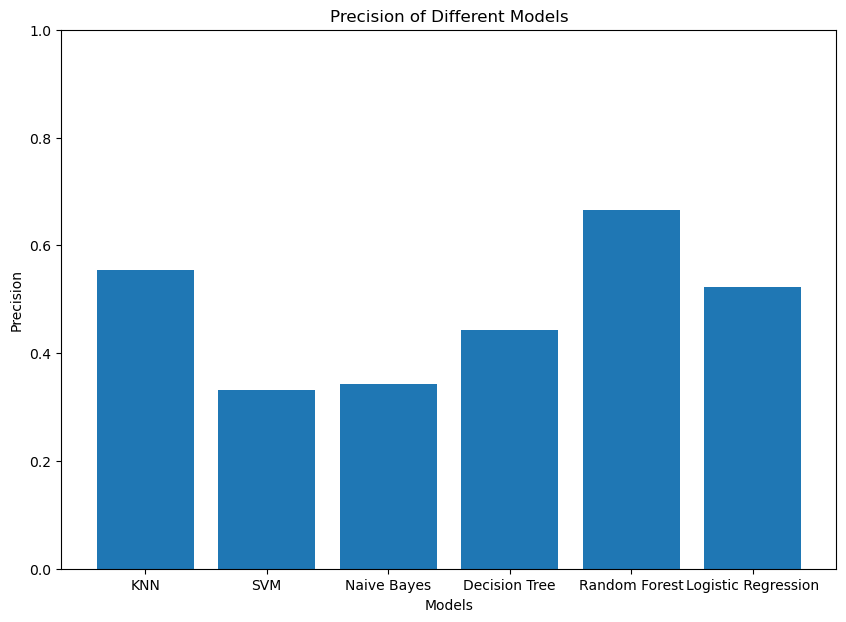

In [17]:
# Plot the precision of all models
plt.figure(figsize=(10,7))
plt.bar(results.keys(), [result["precision"] for result in results.values()])
plt.title("Precision of Different Models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0, 1)
plt.show()

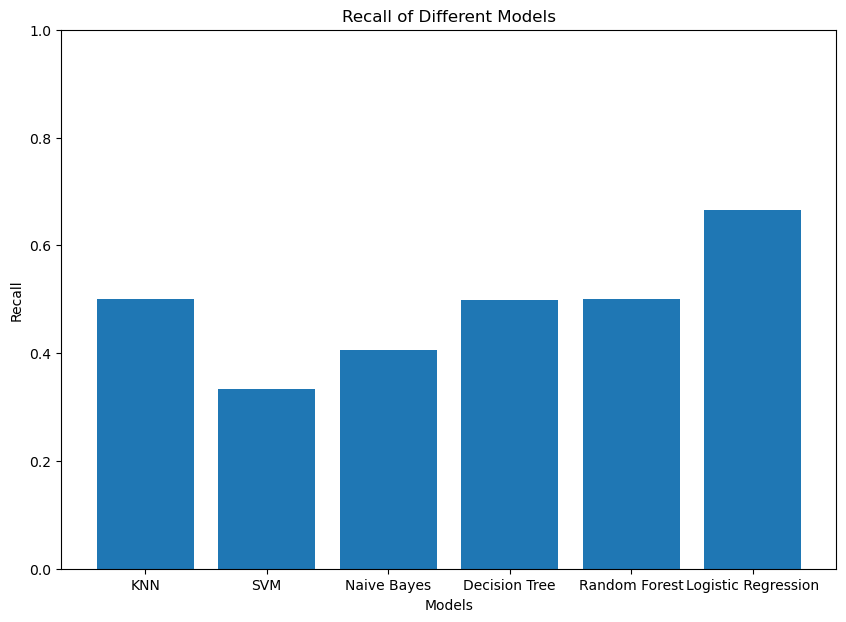

In [18]:
# Plot the recall of all models
plt.figure(figsize=(10,7))
plt.bar(results.keys(), [result["recall"] for result in results.values()])
plt.title("Recall of Different Models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.show()

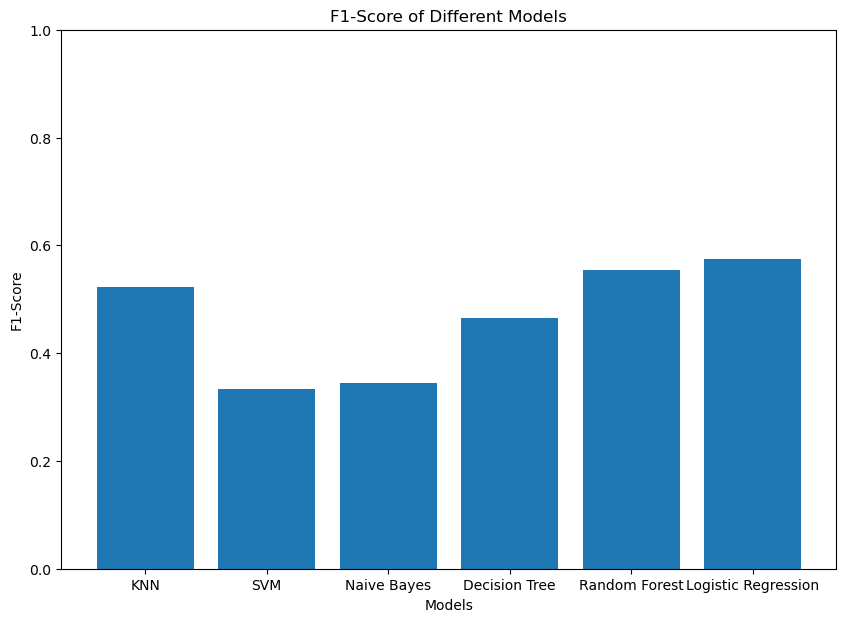

In [19]:
# Plot the F1-score of all models
plt.figure(figsize=(10,7))
plt.bar(results.keys(), [result["f1_score"] for result in results.values()])
plt.title("F1-Score of Different Models")
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.ylim(0, 1)
plt.show()

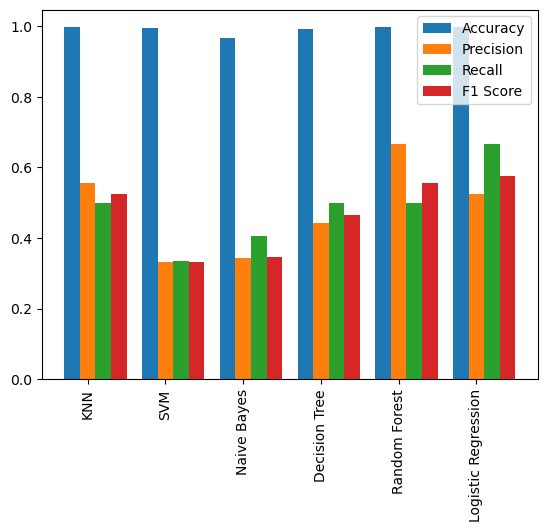

In [21]:
# extract metrics values
accuracies = [results[model]['accuracy'] for model in results]
precisions = [results[model]['precision'] for model in results]
recalls = [results[model]['recall'] for model in results]
f1_scores = [results[model]['f1_score'] for model in results]

# plot bar chart
bar_width = 0.2
index = np.arange(len(results))

plt.bar(index, accuracies, bar_width, label='Accuracy')
plt.bar(index + bar_width, precisions, bar_width, label='Precision')
plt.bar(index + 2 * bar_width, recalls, bar_width, label='Recall')
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label='F1 Score')

plt.xticks(index + bar_width, list(results.keys()), rotation ='vertical')
plt.legend()
plt.show()

Conclusion:

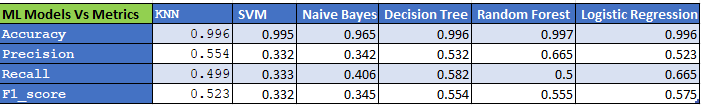


Based on the model performance outcome, the 'Logistic Regression' model appears to be the best among all the models with highest accuracy (0.997), precision (0.523), recall (0.665) and f1_score (0.575). Suggesting Logistic Regression model has the uppermost aptitude to fittingly classify emails as Spam or not spam, with minimal false positives and false negatives.

SVM Model is more effective in high dimensional spaces, it might not be optimal for this data sets  as it contains only two out comes – Spam and Not spam

It is worth observing that the performance of a model is subjected on the specific use of the case and problem at hand. For instance, if the cost of misclassifying an email as spam when it is not is higher, then a model with a high recall (even if its precision is lower) might be more desirable.

